# Multiple Linear Regression

In [ ]:
!pip install sklearn numpy matplotlib

## Loading the datasets

#### We load the diabetes dataset, which contains features (X) and target values (y).

In [118]:
from sklearn.datasets import load_diabetes

In [119]:
# import pandas as pd

# # Load the dataset
# diabetes = load_diabetes()  # Note: Don't use return_X_y=True here

# # Convert to pandas DataFrame
# df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

# # Add the target column
# df['Disease_Progression'] = diabetes.target

# # Display the first few rows
# print(df.head())

In [120]:
X, y = load_diabetes(return_X_y=True)

## Exploring the datasets

#### Let's examine the shapes of the feature matrix X and the target vector y to understand the dataset dimensions.

In [121]:
X.shape

(442, 10)

In [122]:
y.shape

(442,)

## Splitting the data into training and testing sets

#### We split the dataset into training (80%) and testing (20%) sets to evaluate our model's performance.

In [123]:
from sklearn.model_selection import train_test_split

In [124]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y , test_size=0.2, random_state=18)

In [125]:
X_train.shape

(353, 10)

In [126]:
Y_train.shape

(353,)

## Implementing Linear Regression with Scikit-Learn

#### We use scikit-learn's LinearRegression to train a model and make predictions.

In [127]:
from sklearn.linear_model import LinearRegression

In [128]:
mlr1 = LinearRegression()

In [129]:
mlr1.fit(X_train, Y_train)

LinearRegression()

In [130]:
Y_pred1 = mlr1.predict(X_test)

#### Calculate and display the R² score to evaluate the model's performance.

In [131]:
from sklearn.metrics import r2_score

In [132]:
r2_score(Y_test, Y_pred1)

0.4915254517966785

#### Extract and display the intercept and coefficients of the trained model.

In [133]:
mlr1.coef_

array([  33.86613698, -273.44971856,  466.58017053,  337.65891227,
       -806.35981263,  592.36046805,   92.48275413,  182.36792969,
        697.41630107,   89.11282567])

In [134]:
mlr1.intercept_

np.float64(153.32760069777532)

## Implementing Custom Multiple Linear Regression

#### We define a custom MultipleLinearRegression class to implement linear regression from scratch using the normal equation.

In [135]:
import numpy as np

In [136]:
class Multi_LR:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X_train, Y_train):
        X_train = np.insert(X_train, 0, 1, axis = 1)

        betas = np.linalg.inv(np.dot(X_train.T, X_train)).dot(X_train.T).dot(Y_train)
        self.coef_ = betas[1:]
        self.intercept_ = betas[0]

    def predict(self,X_test):
        Y_pred = self.intercept_ + np.dot(X_test, self.coef_)
        return Y_pred

In [141]:
Multi_LR = Multi_LR()

In [142]:
Multi_LR.fit(X_train, Y_train)

In [143]:
Y_pred = Multi_LR.predict(X_test)

#### Calculate and display the R² score for the custom model.

In [146]:
mlr = r2_score(Y_test, Y_pred)
mlr

0.49152545179667906

#### Extract and display the intercept and coefficients of the custom model.

In [147]:
Multi_LR.coef_

array([  33.86613698, -273.44971856,  466.58017053,  337.65891227,
       -806.35981263,  592.36046805,   92.48275413,  182.36792969,
        697.41630107,   89.11282567])

In [148]:
Multi_LR.intercept_

np.float64(153.3276006977753)

## Visualising the results

#### We plot the actual vs. predicted values to visualize the model's performance.

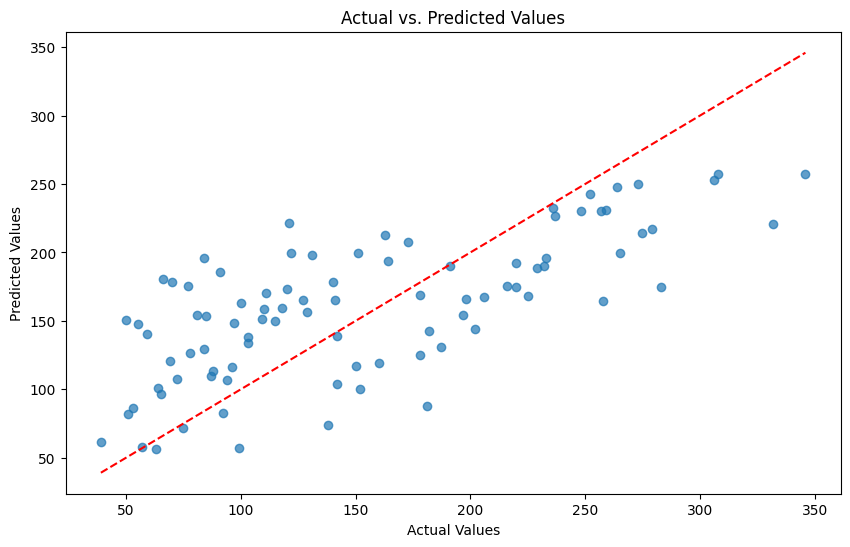

In [149]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, alpha=0.7)  # Scatter plot of actual vs. predicted
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], 'r--')  # Perfect fit line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

## Conclusion

* **Identical Coefficients & Intercept**:
    * Both models produced the same intercept (153.3276) and same coefficients (e.g., [33.866, -273.449, 466.580, ...]).
    * This confirms that our custom implementation correctly applies the normal equation for linear regression.
* **Similar R² Score**:
    * Both models achieved an R² score of ~0.4915, meaning they explain about 49.15% of the variance in the target variable.
    * This indicates that our custom model performs just as well as scikit-learn’s implementation on this dataset.